In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('C:/Users/user/github/Data/aifactory/test_data.csv')
train = pd.read_csv('C:/Users/user/github/Data/aifactory/train_data.csv')

In [3]:
train = train.drop('out_pressure', axis=1)
test = test.drop('out_pressure',axis=1)

In [4]:
train_x_1 = train[(train['type']==0) | (train['type']==4)| (train['type']==5) | (train['type']==6) | (train['type']==7)]
train_x_2 = train[train['type'] == 1]
train_x_3 = train[train['type'] == 2]
train_x_4 = train[train['type'] == 3]

test_x_1 = test[(test['type']==0) | (test['type']==4)| (test['type']==5) | (test['type']==6) | (test['type']==7)]
test_x_2 = test[test['type'] == 1]
test_x_3 = test[test['type'] == 2]
test_x_4 = test[test['type'] == 3]

train_x_1 = train_x_1.drop('type', axis=1)
train_x_2 = train_x_2.drop('type', axis=1)
train_x_3 = train_x_3.drop('type', axis=1)
train_x_4 = train_x_4.drop('type', axis=1)

test_x_1 = test_x_1.drop('type', axis=1)
test_x_2 = test_x_2.drop('type', axis=1)
test_x_3 = test_x_3.drop('type', axis=1)
test_x_4 = test_x_4.drop('type', axis=1)

In [11]:
tr_rolling = train.rolling(window=20).mean()
ts_rolling = test.rolling(window=20).mean()

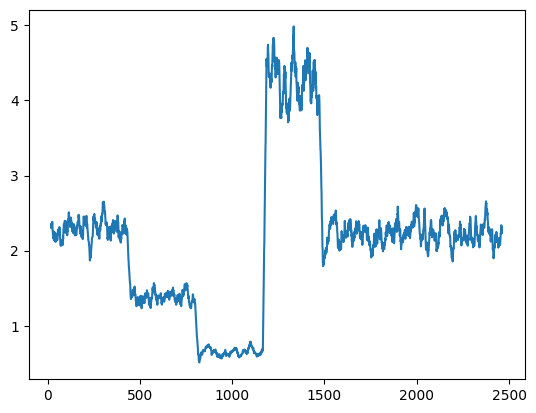

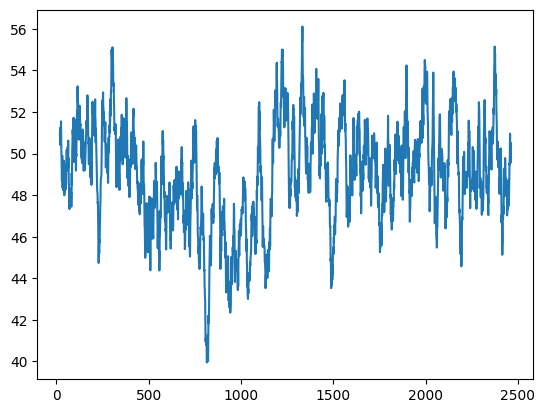

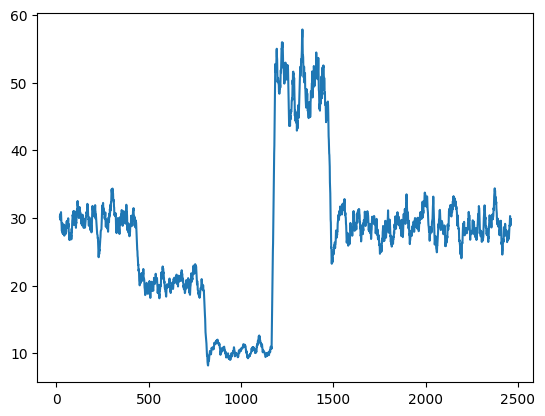

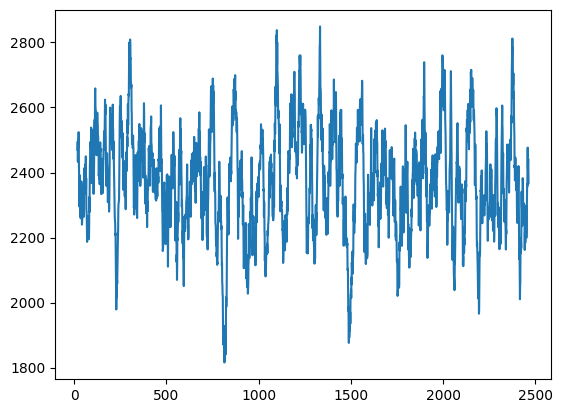

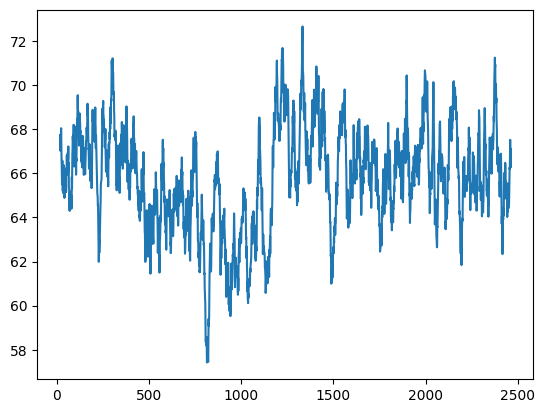

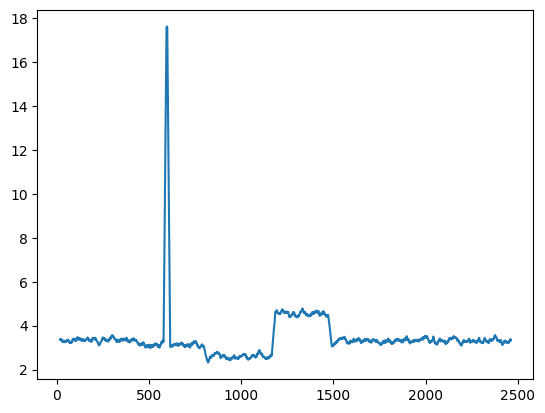

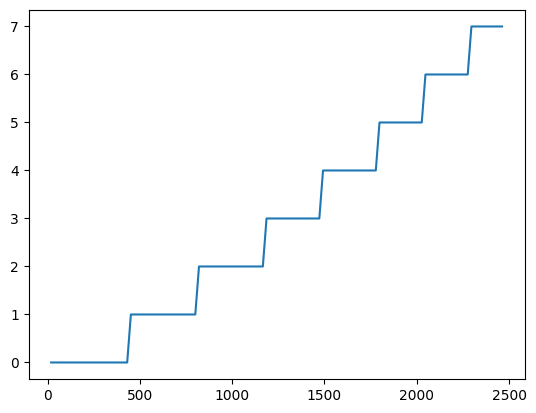

In [12]:
for i in range(len(train.columns)):
    tr_rolling.iloc[:,i].plot()
    plt.show()

In [9]:
test.rolling(window=20).mean()

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7384,2.2535,49.8240,29.1605,2385.80,66.5085,3.3250,7.0
7385,2.2540,49.8310,29.1675,2386.35,66.5145,3.3250,7.0
7386,2.1970,49.0725,28.4260,2325.70,65.8405,3.2915,7.0
7387,2.1490,48.4320,27.7995,2274.45,65.2715,3.2630,7.0


In [15]:
import rrcf

In [16]:
def create_forest(num_trees):

        forest = []
        for _ in range(num_trees):
            tree = rrcf.RCTree()
            forest.append(tree)

        return forest

In [17]:
#check anomaly with RRCF
def anomaly_detection(self, data):
    for tree in self.forest:
        if len(tree.leaves) > self.tree_size:
            tree.forget_point(self.idx-self.tree_size)
            
        tree.insert_point(data, index=self.idx)

        if not self.idx in self.avg_codisp:
            self.avg_codisp[self.idx] = 0
        self.avg_codisp[self.idx] += tree.codisp(self.idx) / self.num_trees
    # avg_codisp은 (각 tree 이 point를 anomaly로 생각하는 정도)의 평균
    mean = np.array(list(self.avg_codisp.values())).mean()
    std = np.array(list(self.avg_codisp.values())).std()

    z = (self.avg_codisp[self.idx] - mean)/std
    self.idx += 1
    if z > 3.0 or z < -3.0 :
        return self.previous_train_batch.mean()
        # if abs(z-score) is over 3.0
        # replace the value with the mean of whole data we met

    else :
        return data
    #if not over 3.0, then no need to replace the value